In [ ]:
# Importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files
import seaborn as sns
from google.colab import files
import statsmodels.api as sm

In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving datos-encuesta-infitulua-30-dias.xlsx to datos-encuesta-infitulua-30-dias.xlsx


In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Feb-29-2024_Apr-30-2024_316951678092714.csv to Feb-29-2024_Apr-30-2024_316951678092714.csv


In [ ]:
data_encuesta_favorabilidad_infitula = pd.read_excel('datos-encuesta-infitulua-30-dias.xlsx')

In [ ]:
data_instagram_infitula = pd.read_csv('Feb-29-2024_Apr-30-2024_316951678092714.csv')

In [ ]:
data_encuesta_favorabilidad_infitula

,Registro,Dispositivo,Género,Unnamed: 3,1. Año de Nacimiento del encuestado,2. ¿Conoce qué hace la institución INFITULUA?,3. ¿Cuáles de estos servicios ha utilizado?,4. ¿Qué tan seguido utiliza los servicios de INFITULUA?,5. ¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Duración
0,2024-05-07 07:46:36,phone,female,NaN,1988,"Sé que existe, pero no sé qué hace",Ninguno,En ocasiones,Regulares,00:51
1,2024-05-07 01:13:04,phone,male,NaN,1990,"Más o menos, pero no lo sé todo.",Cliente de Urbanización Terranova,En ocasiones,Regulares,00:28
2,2024-05-06 18:15:27,phone,male,NaN,1997,"Si, lo sé muy bien",Ninguno,Nunca,No he utilizado los servicios,00:39
3,2024-05-06 17:39:27,phone,female,NaN,2001,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Casi siempre,Muy buenos,00:36
4,2024-05-06 09:45:36,phone,male,NaN,1987,"Más o menos, pero no lo sé todo.","Cliente nueva Terminal de Transportes, Cliente...",Nunca,No he utilizado los servicios,00:42
...,...,...,...,...,...,...,...,...,...,...
71,2024-04-17 12:56:16,phone,male,NaN,22 mayo 1996,"Sé que existe, pero no sé qué hace","Cliente nueva Terminal de Transportes, Cliente...",Nunca,Buenos,00:36
72,2024-04-09 13:12:17,computer,male,NaN,NaN,NaN,NaN,NaN,NaN,21:36
73,2024-04-09 12:35:02,computer,male,NaN,NaN,"No, no tengo conocimiento de esta institución",Cliente de la ciudadela,NaN,No he utilizado los servicios,03:45
74,2024-04-08 21:40:23,computer,female,NaN,NaN,NaN,NaN,NaN,NaN,53:33


<Axes: title={'center': 'Distribución torneos'}, ylabel='count'>

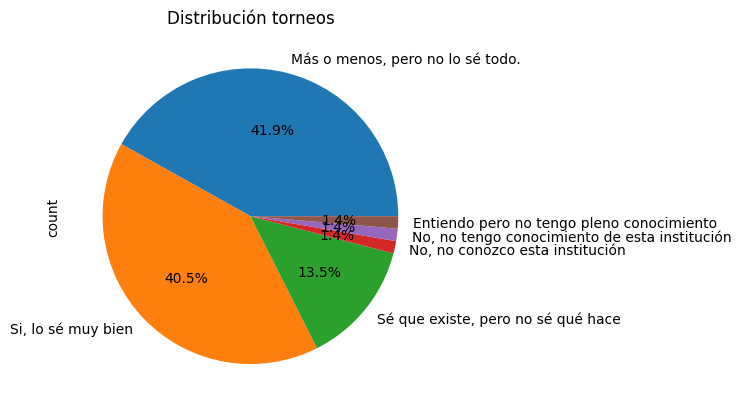

In [ ]:
data_encuesta_favorabilidad_infitula.value_counts('2. ¿Conoce qué hace la institución INFITULUA?')/76*100

data_encuesta_favorabilidad_infitula['2. ¿Conoce qué hace la institución INFITULUA?'].value_counts().plot(kind='pie',autopct='%.1f%%', title='Distribución torneos')

In [ ]:
data_instagram_infitula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identificador de la publicación  16 non-null     int64  
 1   Identificador de la cuenta       16 non-null     int64  
 2   Nombre de usuario de la cuenta   16 non-null     object 
 3   Nombre de la cuenta              16 non-null     object 
 4   Descripción                      16 non-null     object 
 5   Duración (segundos)              16 non-null     int64  
 6   Hora de publicación              16 non-null     object 
 7   Enlace permanente                16 non-null     object 
 8   Tipo de publicación              16 non-null     object 
 9   Comentario sobre los datos       0 non-null      float64
 10  Fecha                            16 non-null     object 
 11  Impresiones                      16 non-null     int64  
 12  Alcance                 

In [ ]:
# Convertir la columna 'Hora de publicación' a tipo datetime, manejar errores con 'coerce'
data_instagram_infitula['Hora de publicación'] = pd.to_datetime(data_instagram_infitula['Hora de publicación'], format='%d/%m/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_instagram_infitula['hora_exacta'] = data_instagram_infitula['Hora de publicación'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicación'
data_instagram_infitula['Hora de publicación'] = data_instagram_infitula['Hora de publicación'].dt.strftime('%d/%m/%Y')

# Mostrar el DataFrame resultante
print(data_instagram_infitula)

    Identificador de la publicación  Identificador de la cuenta  \
0                 18023384863876256           17841400356362656   
1                 18063791083507909           17841400356362656   
2                 18022452899073939           17841400356362656   
3                 18011518886467770           17841402591799685   
4                 17969041913702106           17841400356362656   
5                 17869988457072804           17841400356362656   
6                 17968043924584995           17841400356362656   
7                 18112174390326389           17841400356362656   
8                 17999069468309918           17841402591799685   
9                 18030422593899039           17841402591799685   
10                17921936111791481           17841400356362656   
11                18220763401274976           17841402591799685   
12                17995616813627405           17841400356362656   
13                18029797822957955           1784140035636265

In [ ]:
data_instagram_infitula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identificador de la publicación  16 non-null     int64  
 1   Identificador de la cuenta       16 non-null     int64  
 2   Nombre de usuario de la cuenta   16 non-null     object 
 3   Nombre de la cuenta              16 non-null     object 
 4   Descripción                      16 non-null     object 
 5   Duración (segundos)              16 non-null     int64  
 6   Hora de publicación              9 non-null      object 
 7   Enlace permanente                16 non-null     object 
 8   Tipo de publicación              16 non-null     object 
 9   Comentario sobre los datos       0 non-null      float64
 10  Fecha                            16 non-null     object 
 11  Impresiones                      16 non-null     int64  
 12  Alcance                 

In [ ]:
data2= data_instagram_infitula[['Veces que se guardó', 'Veces que se compartió', 'Alcance', 'Me gusta','Reproducciones','Comentarios','Seguimientos','Duración (segundos)']]
data2.head()

In [ ]:
data_encuesta_favorabilidad_infitula.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


KeyError: 'Genre'

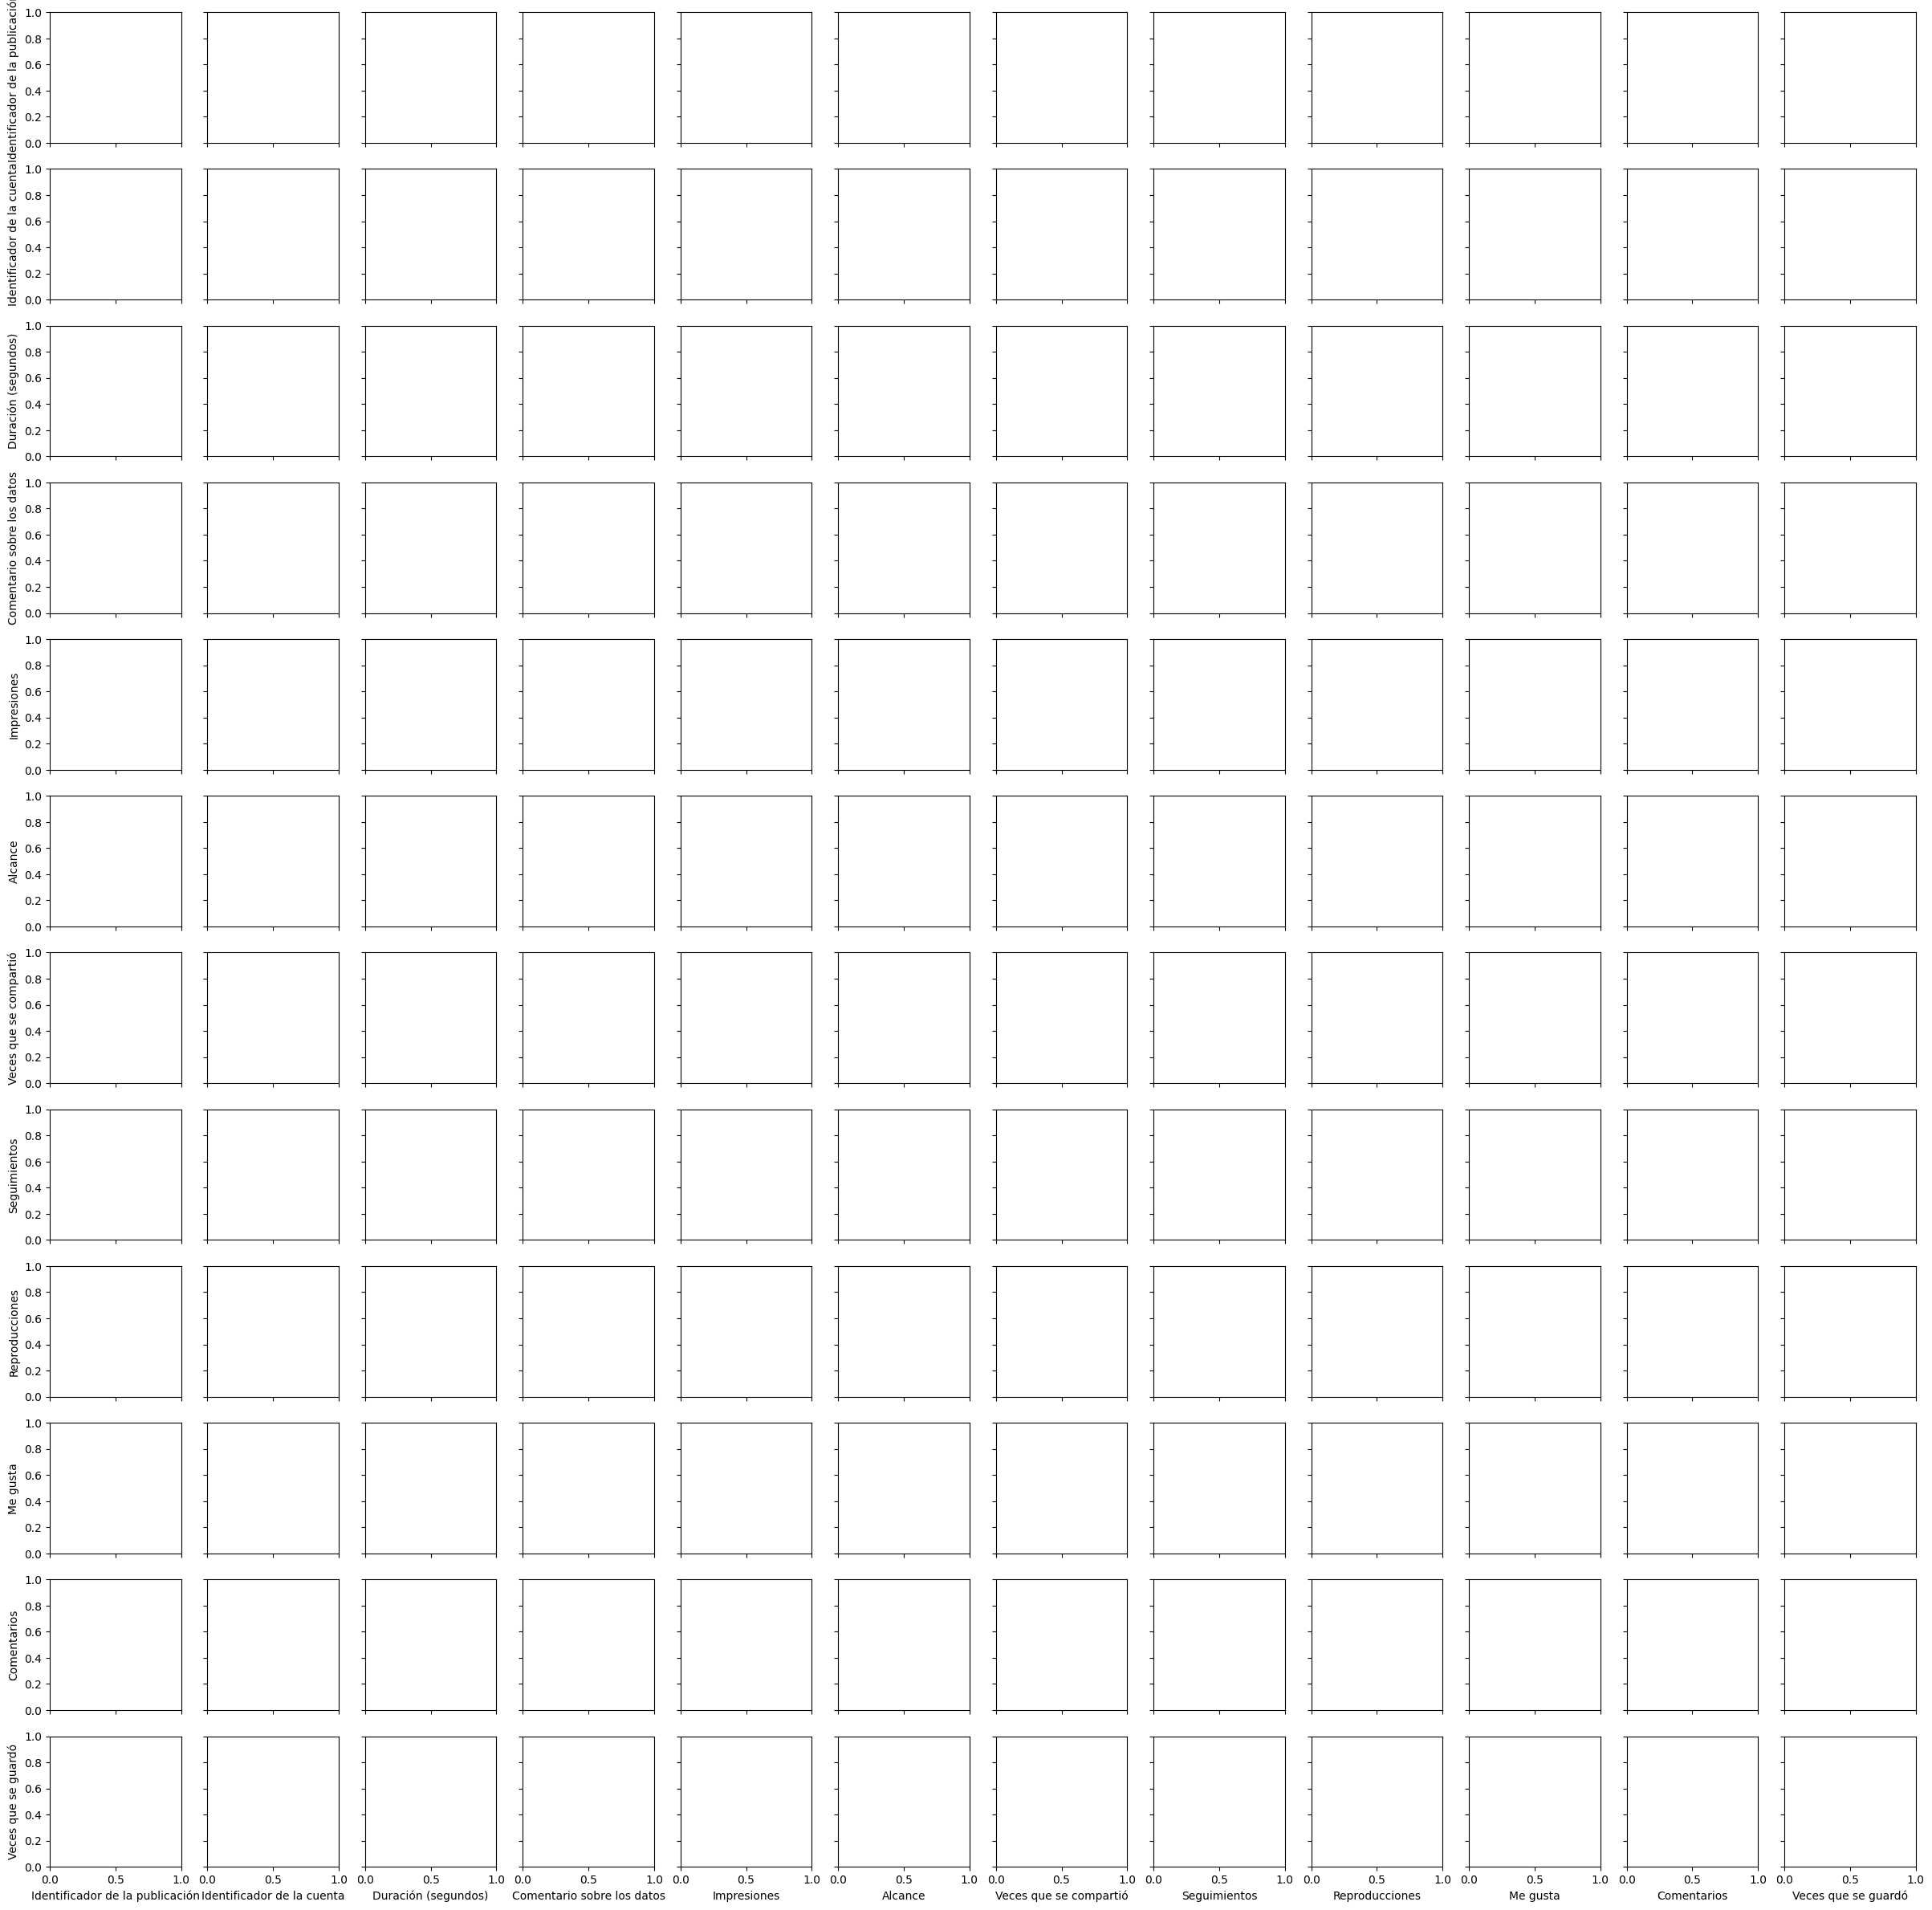

In [ ]:
sns.pairplot(data_instagram_infitula, hue='Genre')